<a href="https://colab.research.google.com/github/AkashArya96/Wine_Variety-_Prediction/blob/main/Forescasting_WIne_variety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time


from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, mean_squared_error, r2_score

In [62]:
df =pd.read_csv('/content/drive/MyDrive/HurreyTech Assignment/train.csv')

In [63]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [64]:
df.shape

(82657, 12)

In [65]:
df.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [66]:
print(df['variety'].unique())
len_variety = len(df['variety'].unique())
len_variety

['Chardonnay' 'Red Blend' 'Nebbiolo' 'Bordeaux-style White Blend' 'Malbec'
 'Cabernet Sauvignon' 'Zinfandel' 'Pinot Noir' 'Sauvignon Blanc' 'Gamay'
 'Grüner Veltliner' 'Bordeaux-style Red Blend' 'Sangiovese' 'Syrah'
 'White Blend' 'Cabernet Franc' 'Portuguese Red' 'Portuguese White'
 'Rhône-style Red Blend' 'Rosé' 'Champagne Blend' 'Merlot' 'Riesling'
 'Sparkling Blend' 'Pinot Grigio' 'Tempranillo' 'Pinot Gris'
 'Gewürztraminer']


28

# Visualization
 # 1. Variety Distribution
> Pinot Noir is most popular variety across most **countries**

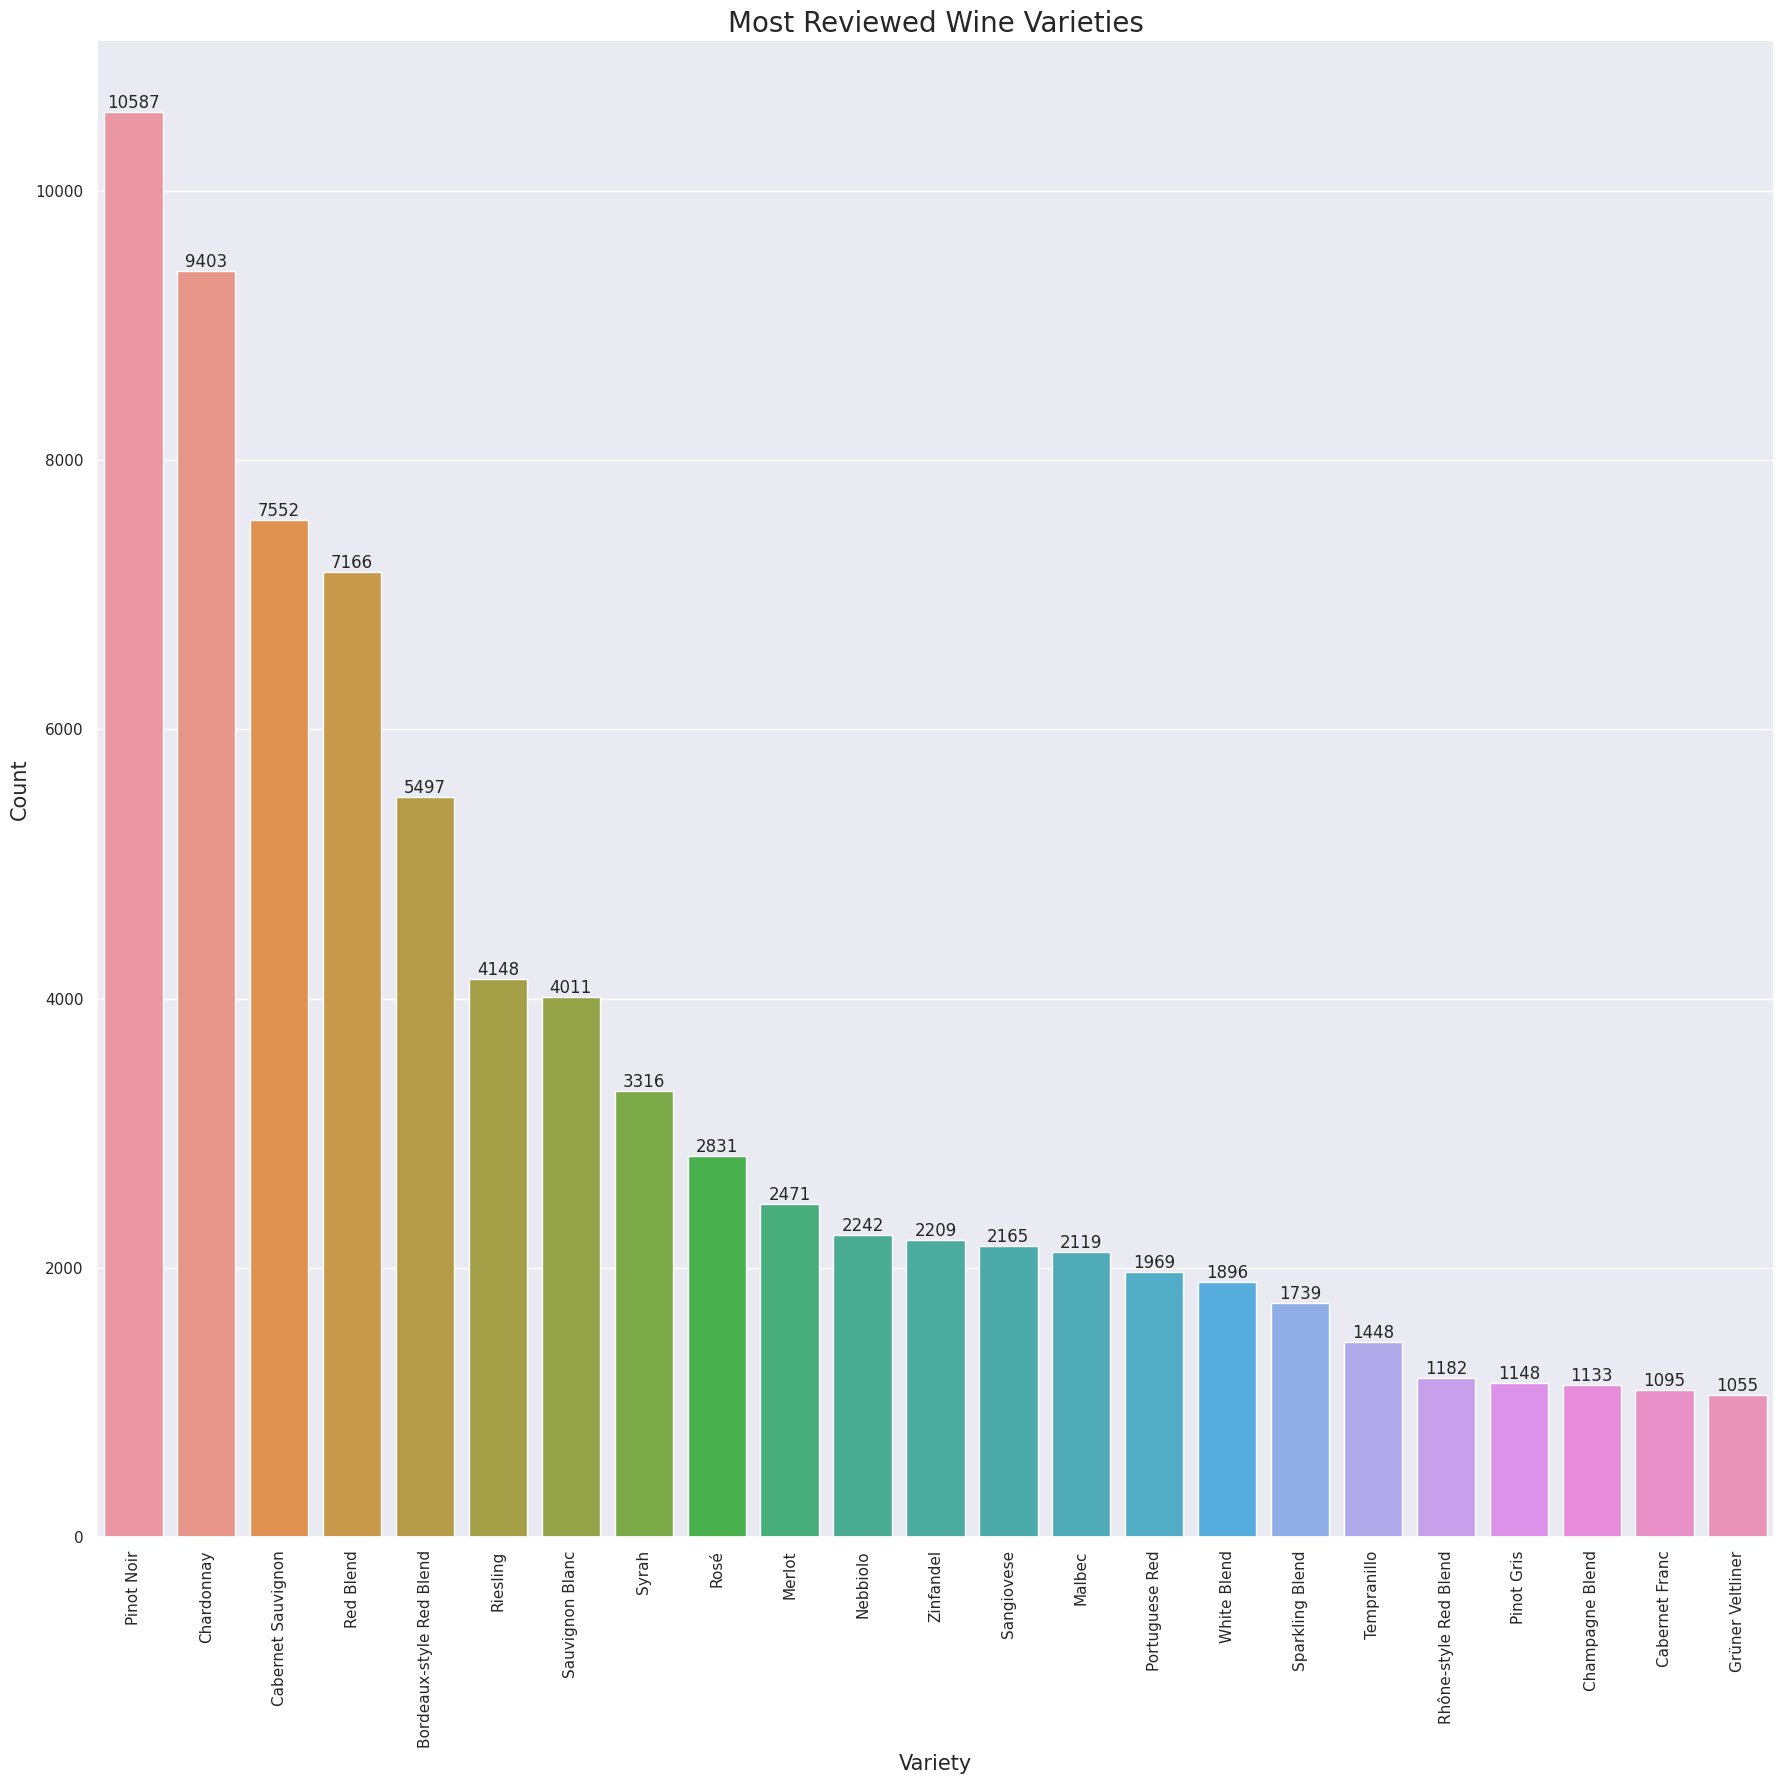

In [67]:
# Get the counts of each wine variety
variety_counts = df['variety'].value_counts()

# Filter the varieties with more than 1000 reviews
varieties = variety_counts[variety_counts > 1000].index

# Filter the DataFrame to include only the selected varieties
variety_filtered = df[df['variety'].isin(varieties)]

# Count the occurrences of each variety in the filtered DataFrame
variety_counts_filtered = variety_filtered['variety'].value_counts()

# Create a bar plot
plt.figure(figsize=(18, 18))
sns.barplot(x=variety_counts_filtered.index, y=variety_counts_filtered.values)

# Set plot properties
plt.title("Most Reviewed Wine Varieties", fontsize=20)
plt.xlabel("Variety", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=90)

# Add text annotations to display their respective counts
for index, value in enumerate(variety_counts_filtered.values):
    plt.text(index, value, f"{value}", ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# 2. Origin Countries

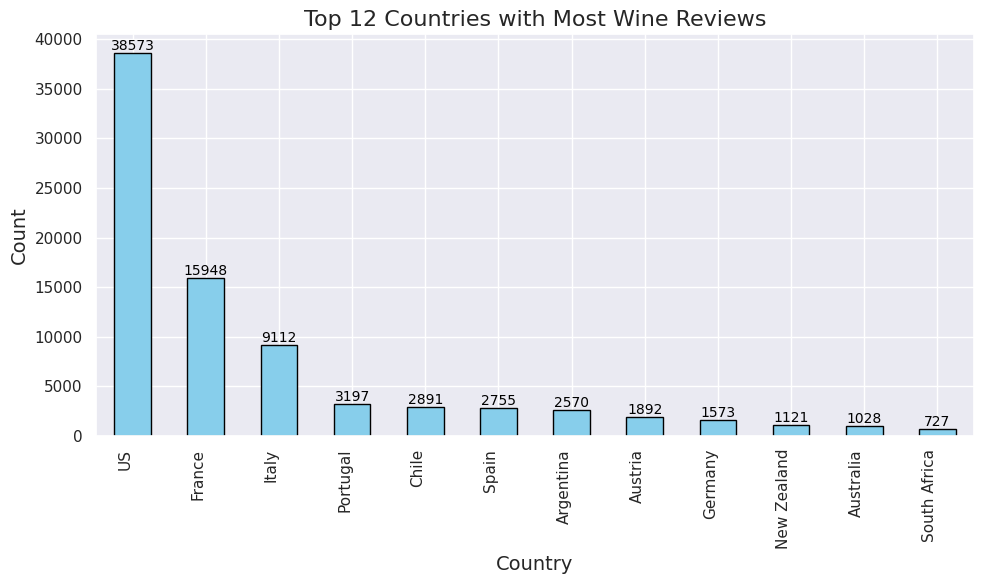

In [68]:
# Get the top 12 most common countries
df_country_counts = df['country'].value_counts().head(12)

# Creating the bar plot
plt.figure(figsize=(10, 6))
ax = df_country_counts.plot.bar(color='skyblue', edgecolor='black')

# Adding text annotations to display respective counts
for i, v in enumerate(df_country_counts):
    ax.text(i, v + 1, str(v), color='black', ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Top 12 Countries with Most Wine Reviews", fontsize=16)

plt.xticks(rotation=90, ha='right')  # Rotating x-axis labels for better readability

plt.tight_layout()
plt.show()

# 3. Price Distribution
> France Wines are Most Expensive

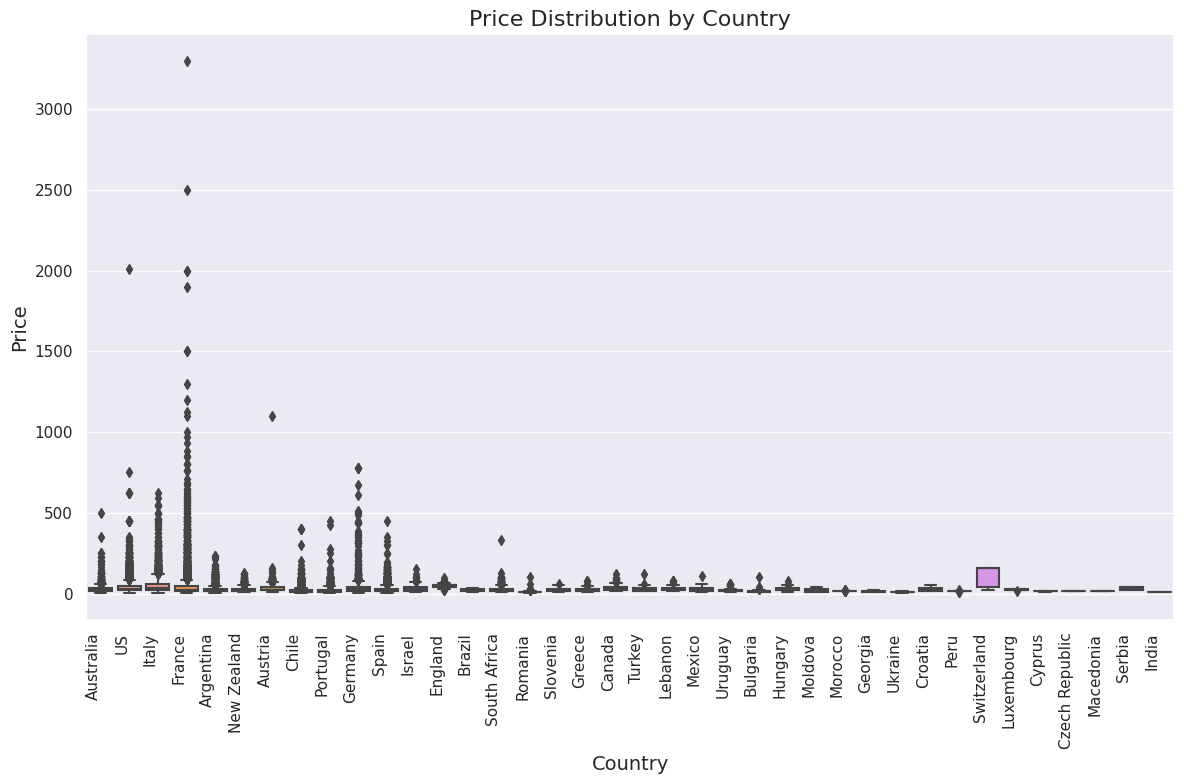

In [69]:
plt.figure(figsize=(12, 8))
sns.set_palette("pastel")
sns.boxplot(data=df, x='country', y='price')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Price Distribution by Country", fontsize=16)

plt.xticks(rotation=90, ha='right')  # Rotating x-axis labels for better readability

plt.tight_layout()
plt.show()

 # 4. Most Review
> More reviews have been recorded by user @vossrouger

Text(0.5, 1.0, ' Most Reviews by User')

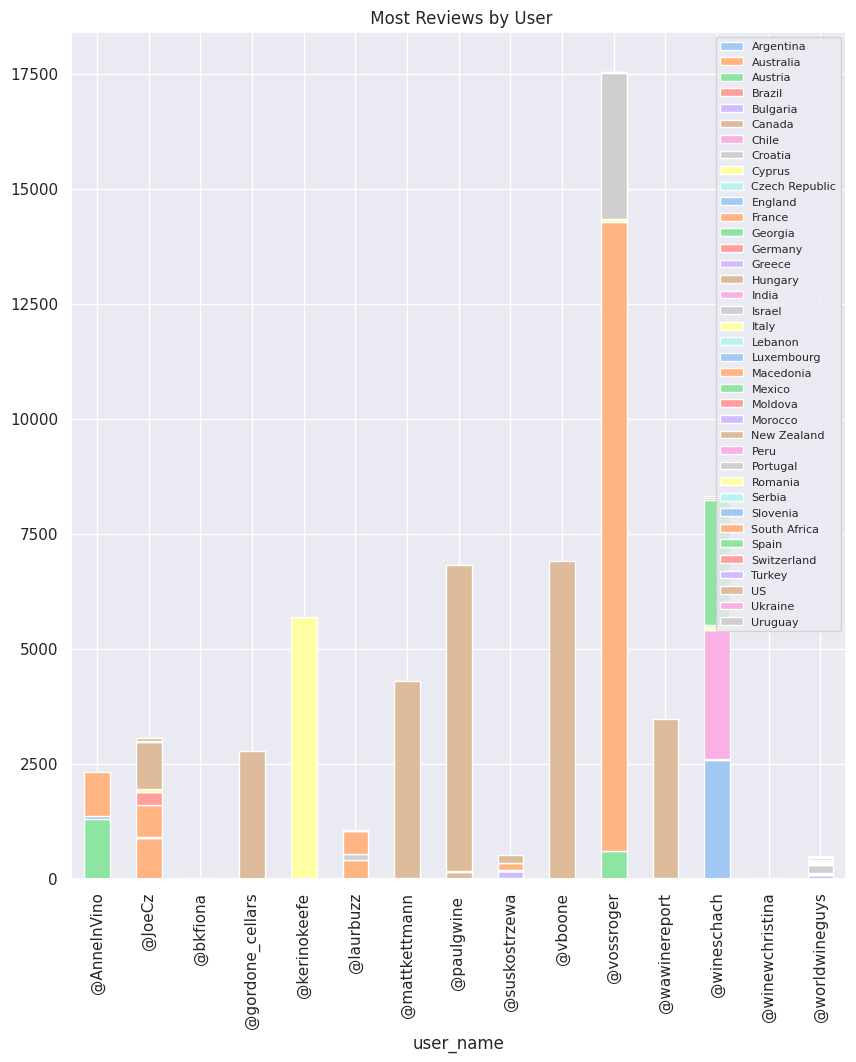

In [70]:
# Most Reviews by User
name = pd.crosstab(index=df['user_name'],columns=df['country'])

# Creating a Bar plot
plot = name.plot(figsize=(10,11),kind='bar', stacked=True)
plot.legend(loc='upper right', fontsize=8)

# Adding a Label
plot.set_title(' Most Reviews by User')


# 5. Price  Vs Plot
> Most of Lies between 85.0 - 92.5

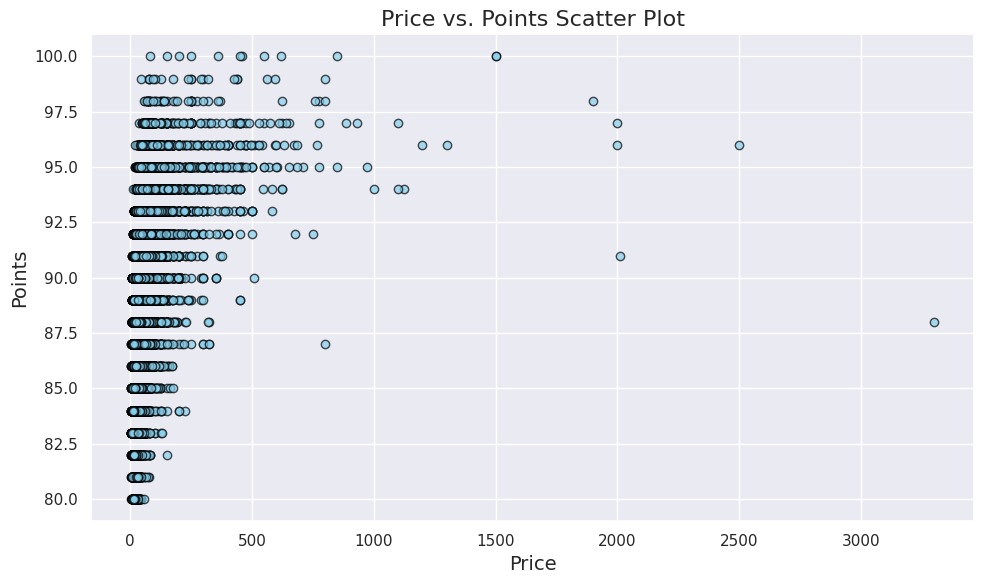

In [71]:
# Create the scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['points'], color='skyblue', edgecolors='black', alpha=0.7)

# Adding labels and title
plt.xlabel("Price", fontsize=14)
plt.ylabel("Points", fontsize=14)
plt.title("Price vs. Points Scatter Plot", fontsize=16)

plt.grid(True)

plt.tight_layout()
plt.show()

# WordCloud


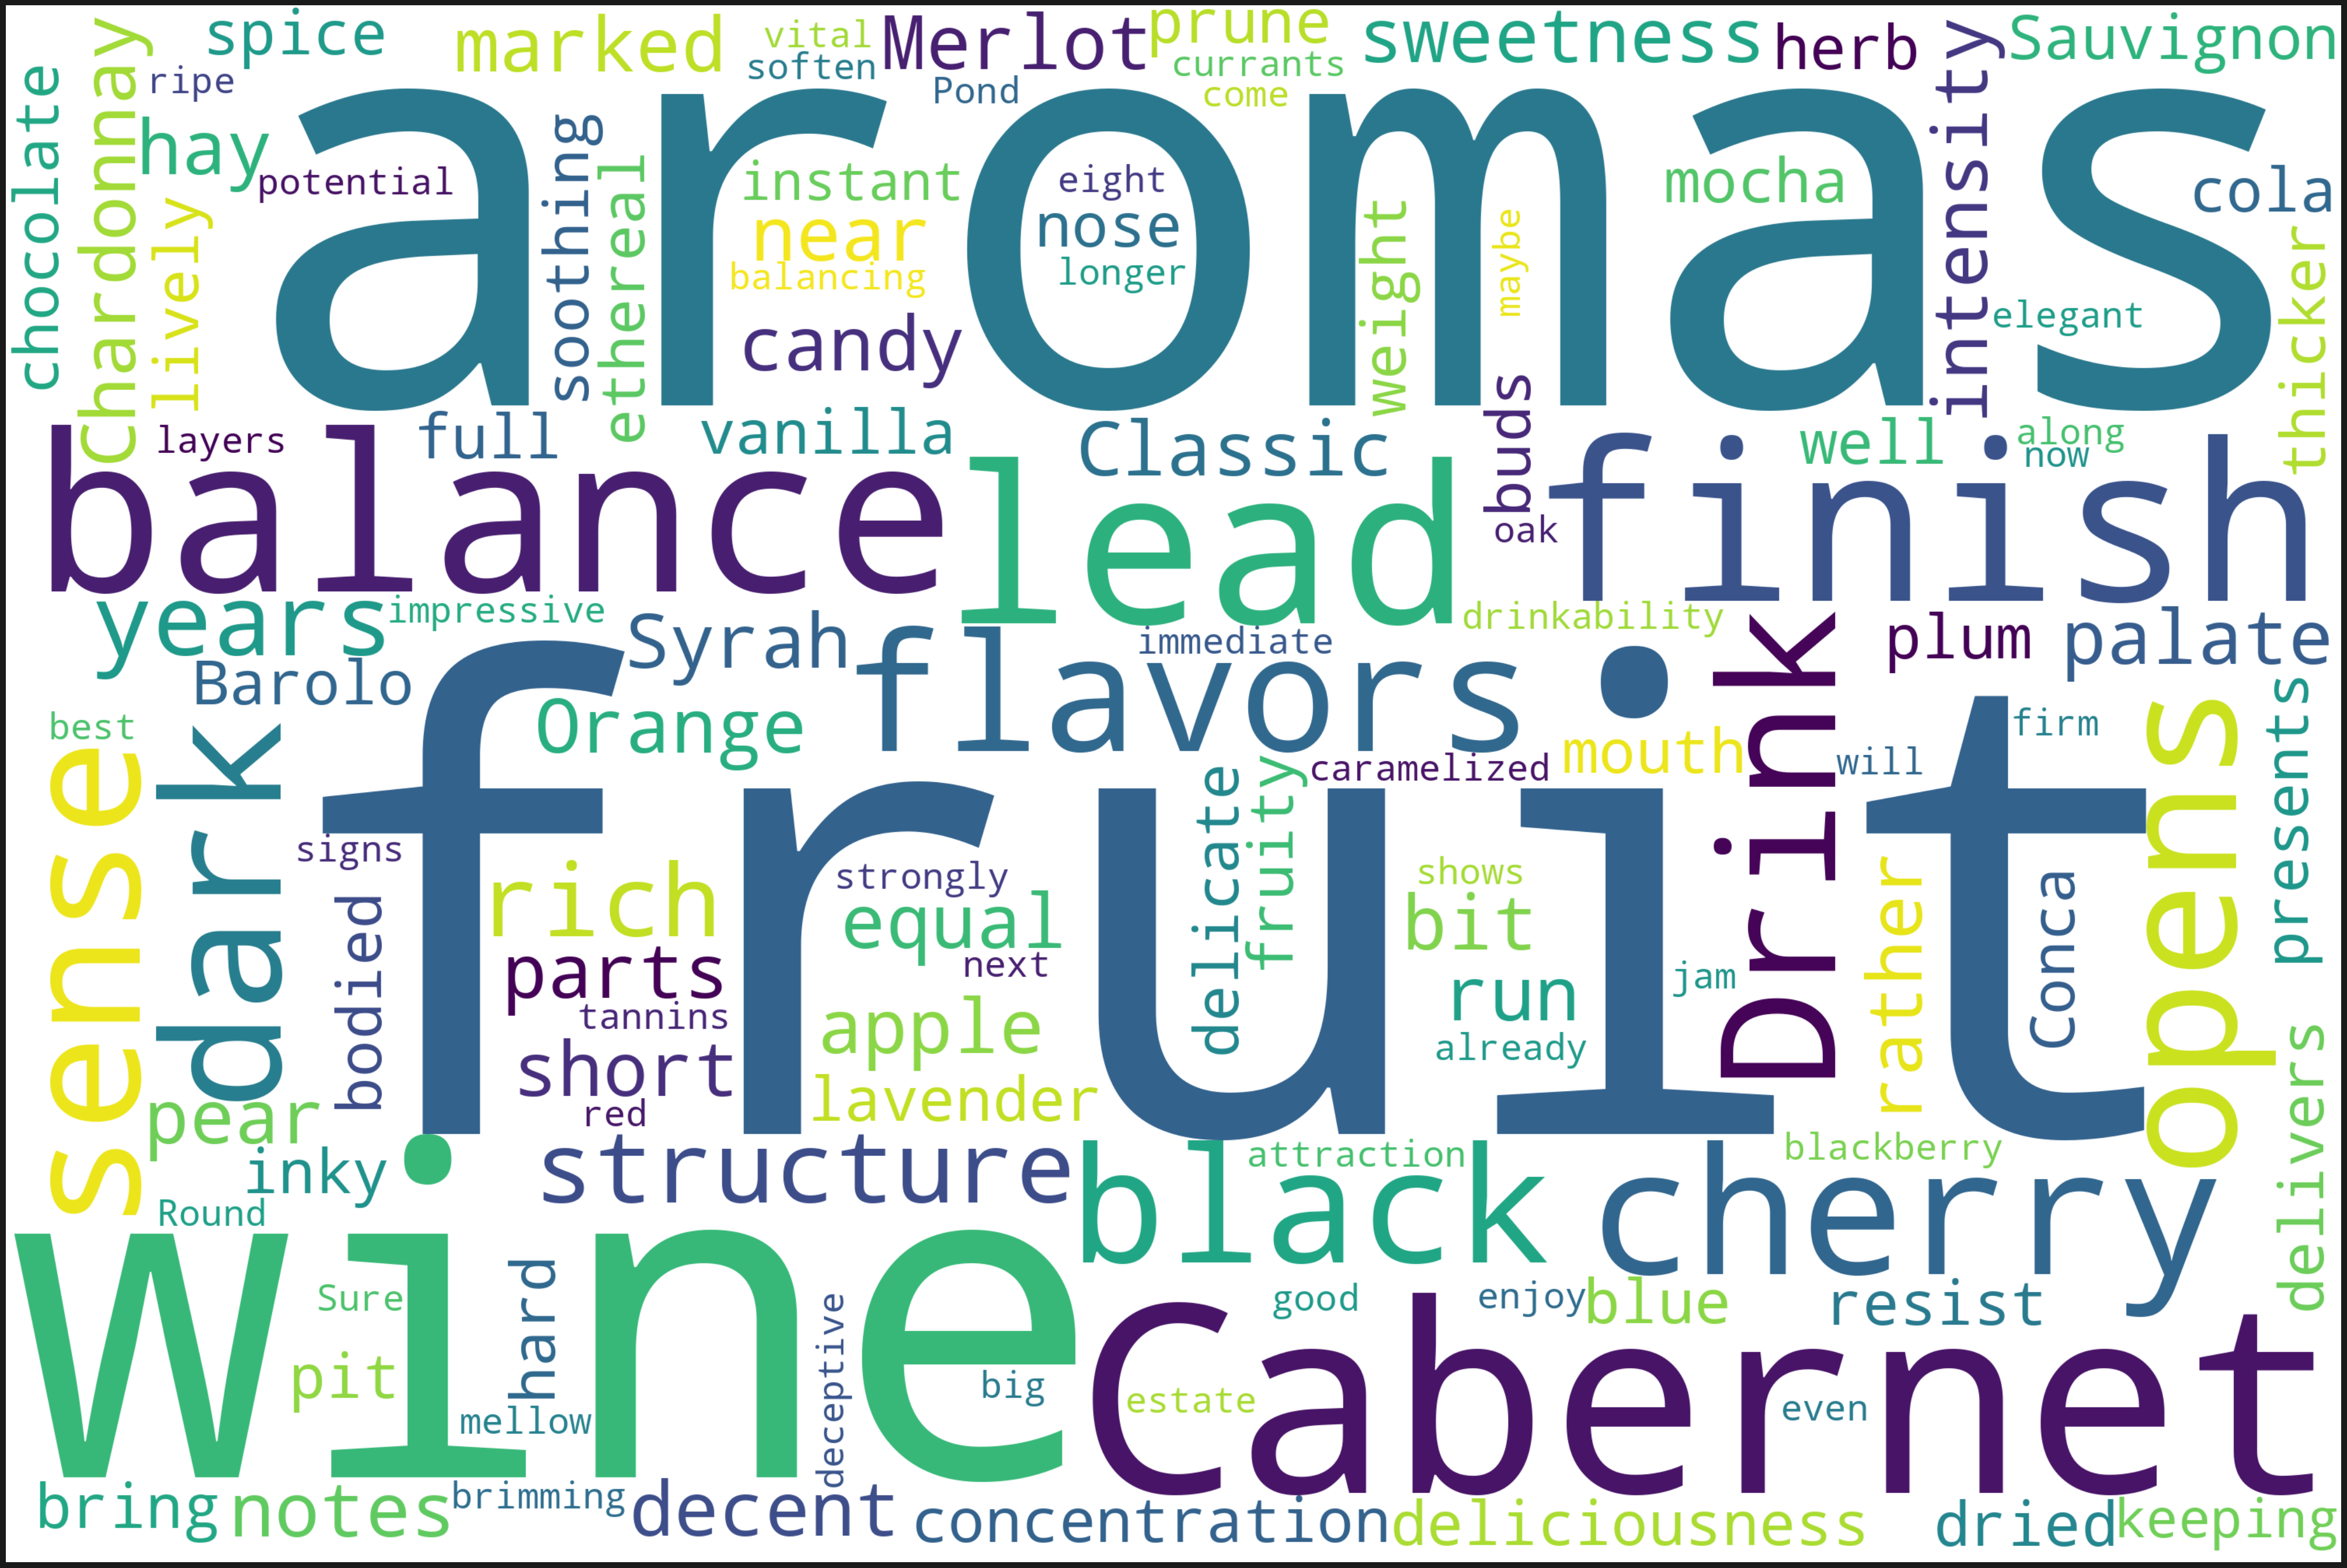

In [72]:
from wordcloud import WordCloud, STOPWORDS
text = df.review_description.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
def Count_vector(text):
    vectorizer = CountVectorizer(lowercase=True, stop_words="english",ngram_range=(1, 2), max_features= 10000)

    vector = vectorizer.fit_transform(np.array(text))
    return vector, vectorizer

In [75]:
vector, vectorizer = Count_vector(df['review_description'])


In [76]:
print(vector)
print(vectorizer)

  (0, 2012)	1
  (0, 1758)	1
  (0, 651)	1
  (0, 571)	1
  (0, 6525)	1
  (0, 4554)	1
  (0, 5077)	1
  (0, 6344)	1
  (0, 5554)	1
  (0, 2568)	1
  (0, 4858)	1
  (0, 1117)	1
  (0, 8625)	1
  (0, 6263)	1
  (0, 1605)	1
  (0, 6024)	1
  (0, 7569)	1
  (0, 7800)	1
  (0, 3378)	1
  (0, 654)	1
  (0, 601)	1
  (0, 5083)	1
  (0, 7801)	1
  (1, 651)	1
  (1, 5077)	1
  :	:
  (82656, 7147)	1
  (82656, 6107)	1
  (82656, 8085)	1
  (82656, 3098)	1
  (82656, 1097)	1
  (82656, 1622)	1
  (82656, 3146)	1
  (82656, 5589)	1
  (82656, 7532)	1
  (82656, 1078)	1
  (82656, 9911)	2
  (82656, 8555)	1
  (82656, 5632)	1
  (82656, 4893)	1
  (82656, 2477)	1
  (82656, 1157)	1
  (82656, 4771)	1
  (82656, 5439)	1
  (82656, 1477)	1
  (82656, 1105)	1
  (82656, 7152)	1
  (82656, 1847)	1
  (82656, 1623)	1
  (82656, 9424)	1
  (82656, 3423)	1
CountVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')


In [77]:
print(vectorizer.vocabulary_)

{'classic': 2012, 'chardonnay': 1758, 'aromas': 651, 'apple': 571, 'pear': 6525, 'hay': 4554, 'lead': 5077, 'palate': 6344, 'marked': 5554, 'decent': 2568, 'intensity': 4858, 'bit': 1117, 'sweetness': 8625, 'orange': 6263, 'candy': 1605, 'notes': 6024, 'run': 7569, 'short': 7800, 'finish': 3378, 'aromas apple': 654, 'apple pear': 601, 'lead palate': 5083, 'short finish': 7801, 'wine': 9578, 'near': 5887, 'equal': 3130, 'parts': 6473, 'syrah': 8631, 'merlot': 5657, 'balance': 896, 'cabernet': 1563, 'sauvignon': 7639, 'blue': 1283, 'fruit': 3948, 'vanilla': 9269, 'cherry': 1805, 'herb': 4589, 'bodied': 1305, 'pit': 6719, 'flavors': 3511, 'bring': 1480, 'sense': 7741, 'deliciousness': 2620, 'hard': 4536, 'resist': 7246, 'equal parts': 3132, 'syrah merlot': 8641, 'balance cabernet': 898, 'cabernet sauvignon': 1569, 'aromas blue': 664, 'blue fruit': 1287, 'fruit vanilla': 4094, 'vanilla cherry': 9278, 'cherry herb': 1845, 'herb lead': 4603, 'lead bodied': 5078, 'fruit flavors': 4002, 'flavo

In [78]:
print(len(vectorizer.vocabulary_))

10000


In [79]:
x = vectorizer.transform(np.array([df['review_description'].iloc[0]]))
print(x)
print(df['review_description'].iloc[0])

  (0, 571)	1
  (0, 601)	1
  (0, 651)	1
  (0, 654)	1
  (0, 1117)	1
  (0, 1605)	1
  (0, 1758)	1
  (0, 2012)	1
  (0, 2568)	1
  (0, 3378)	1
  (0, 4554)	1
  (0, 4858)	1
  (0, 5077)	1
  (0, 5083)	1
  (0, 5554)	1
  (0, 6024)	1
  (0, 6263)	1
  (0, 6344)	1
  (0, 6525)	1
  (0, 7569)	1
  (0, 7800)	1
  (0, 7801)	1
  (0, 8625)	1
Classic Chardonnay aromas of apple, pear and hay lead into a palate marked by decent intensity but also a bit of sweetness. Orange and candy notes run through the rather short finish.


In [80]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['variety']= label_encoder.fit_transform(df['variety'])

In [81]:
y = df['variety']

X = vector

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model 1 : Logistic Regression

In [83]:
lr = LogisticRegression(max_iter = 500)
model_lr = lr.fit(X_train, y_train)
accuracy_lr = model_lr.score(X_test, y_test)
print("Accuracy of the Logistic Regression model is {}%".format(round(accuracy_lr*100,2)))

Accuracy of the Logistic Regression model is 69.53%


# Model 2 : Random Forest

In [84]:
rfc = RandomForestClassifier(n_estimators=100)
model_rfc = rfc.fit(X_train, y_train)
accuracy_rfc = model_rfc.score(X_test, y_test)
print("Accuracy of the Random forest model is {}%".format(round(accuracy_rfc*100,2)))

Accuracy of the Random forest model is 66.15%


# Best Accuracy is With Logistic Regression Model

In [85]:
df_test = pd.read_csv('/content/drive/MyDrive/HurreyTech Assignment/test.csv')

In [94]:
x_test = vectorizer.transform(df_test['review_description'].iloc[0:])
x_test


<20665x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 627211 stored elements in Compressed Sparse Row format>

In [96]:
variety_1 = lr.predict(x_test)
variety_1

array([14,  9,  5, ...,  3, 25,  3])

In [98]:
variety_1 = label_encoder.inverse_transform(var)
df_test['variety'] =variety_1

In [99]:
df_test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Malbec
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Malbec
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Sangiovese


In [100]:
df_test.to_csv('/content/drive/MyDrive/HurreyTech Assignment/submissions.csv')